<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [6]:
# Find the dataset described above
# Hint: search for it through the UCI Machine Learning Repository

import pandas as pd
import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"

# Download the dataset
response = requests.get(url)

# Save the file locally
with open("blood_transfusion.csv", "wb") as file:
    file.write(response.content)

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [9]:
# Read data in pandas
df=pd.read_csv("blood_transfusion.csv")

# Check data has loaded correctly

In [10]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent the absence of data)

In [12]:
new_column_names = {
    'Recency (months)': 'Recency',
    'Frequency (times)': 'Frequency',
    'Monetary (c.c. blood)': 'Monetary',
    'Time (months)': 'Time',
    'whether he/she donated blood in March 2007': 'Target'}
          
df.rename(columns=new_column_names, inplace=True)

In [13]:
df.shape

(748, 5)

In [14]:
df.info

<bound method DataFrame.info of      Recency  Frequency  Monetary  Time  Target
0          2         50     12500    98       1
1          0         13      3250    28       1
2          1         16      4000    35       1
3          2         20      5000    45       1
4          1         24      6000    77       0
..       ...        ...       ...   ...     ...
743       23          2       500    38       0
744       21          2       500    52       0
745       23          3       750    62       0
746       39          1       250    39       0
747       72          1       250    72       0

[748 rows x 5 columns]>

In [15]:
# check for missing data
df.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Target       0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency,748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary,748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time,748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
Target,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


In [17]:
# Check target incidence as a proportion using normalize=True
df.Target.value_counts(normalize=True).round(2)

Target
0    0.76
1    0.24
Name: proportion, dtype: float64

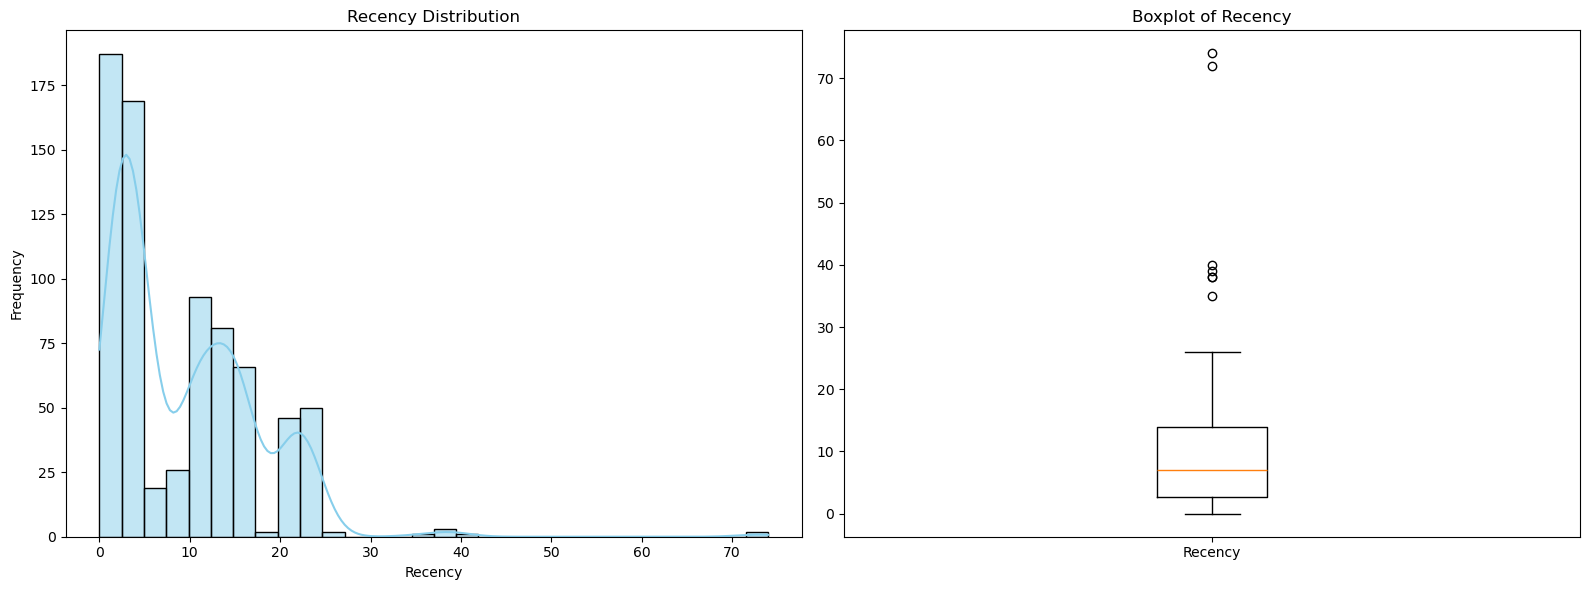

In [18]:
# histplot and boxplot of recency
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(df['Recency'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Recency Distribution')

# Plotting boxplot using matplotlib
axes[1].boxplot(df['Recency'])
axes[1].set_xticklabels(['Recency'])
axes[1].set_title('Boxplot of Recency')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

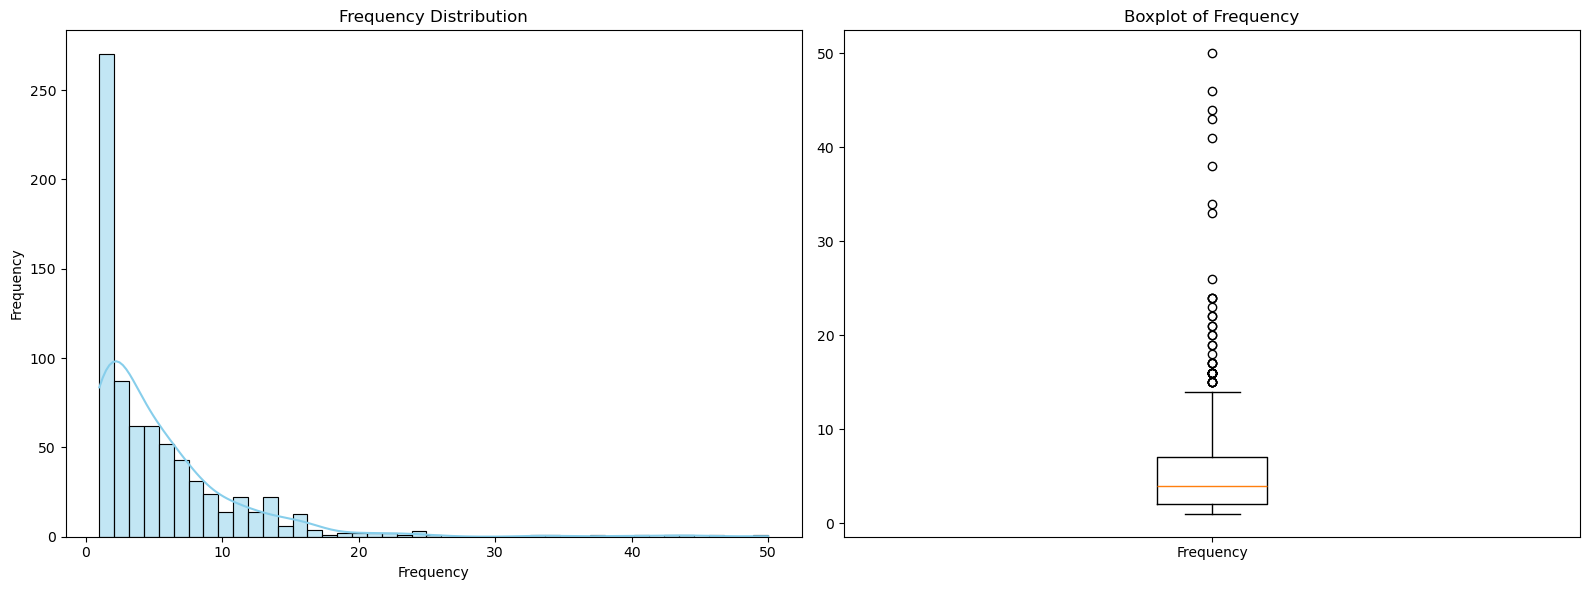

In [19]:
# histplot and boxplot of frequency
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(df['Frequency'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency Distribution')

# Plotting boxplot using matplotlib
axes[1].boxplot(df['Frequency'])
axes[1].set_xticklabels(['Frequency'])
axes[1].set_title('Boxplot of Frequency')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

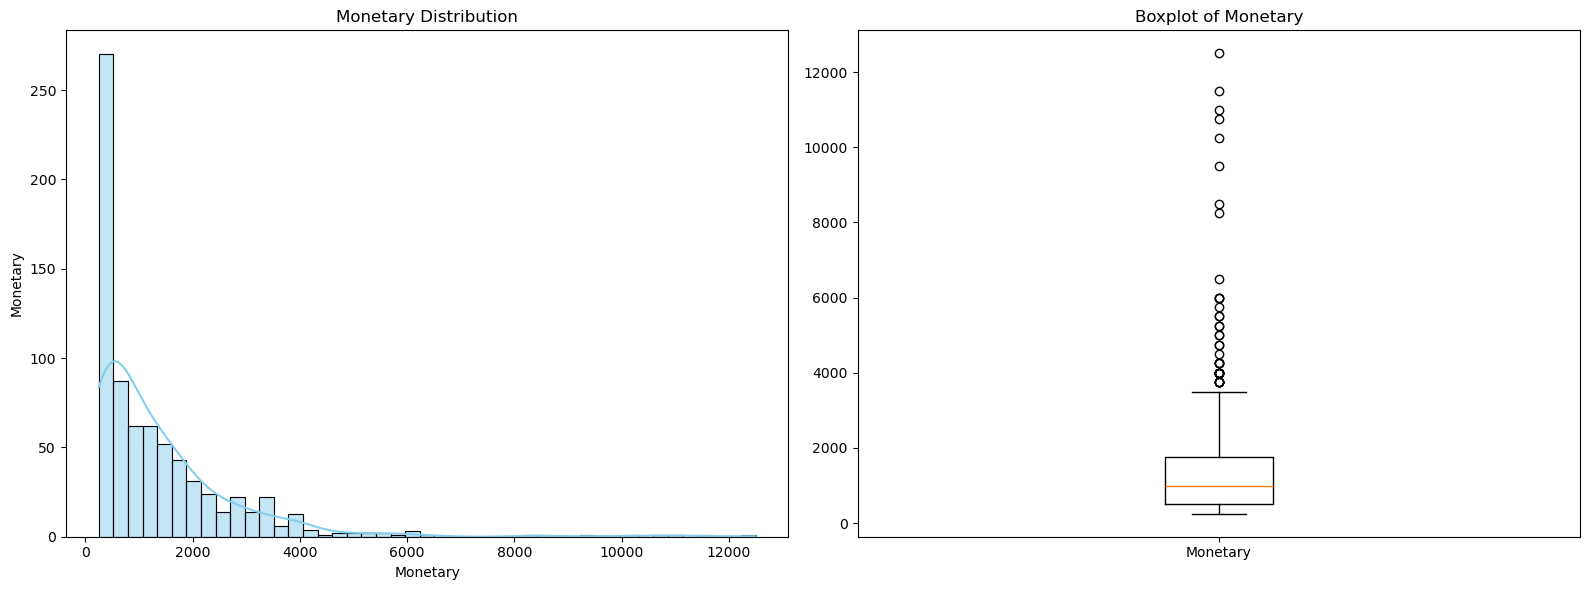

In [20]:
# histplot and boxplot of monetary
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(df['Monetary'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Monetary')
axes[0].set_ylabel('Monetary')
axes[0].set_title('Monetary Distribution')

# Plotting boxplot using matplotlib
axes[1].boxplot(df['Monetary'])
axes[1].set_xticklabels(['Monetary'])
axes[1].set_title('Boxplot of Monetary')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

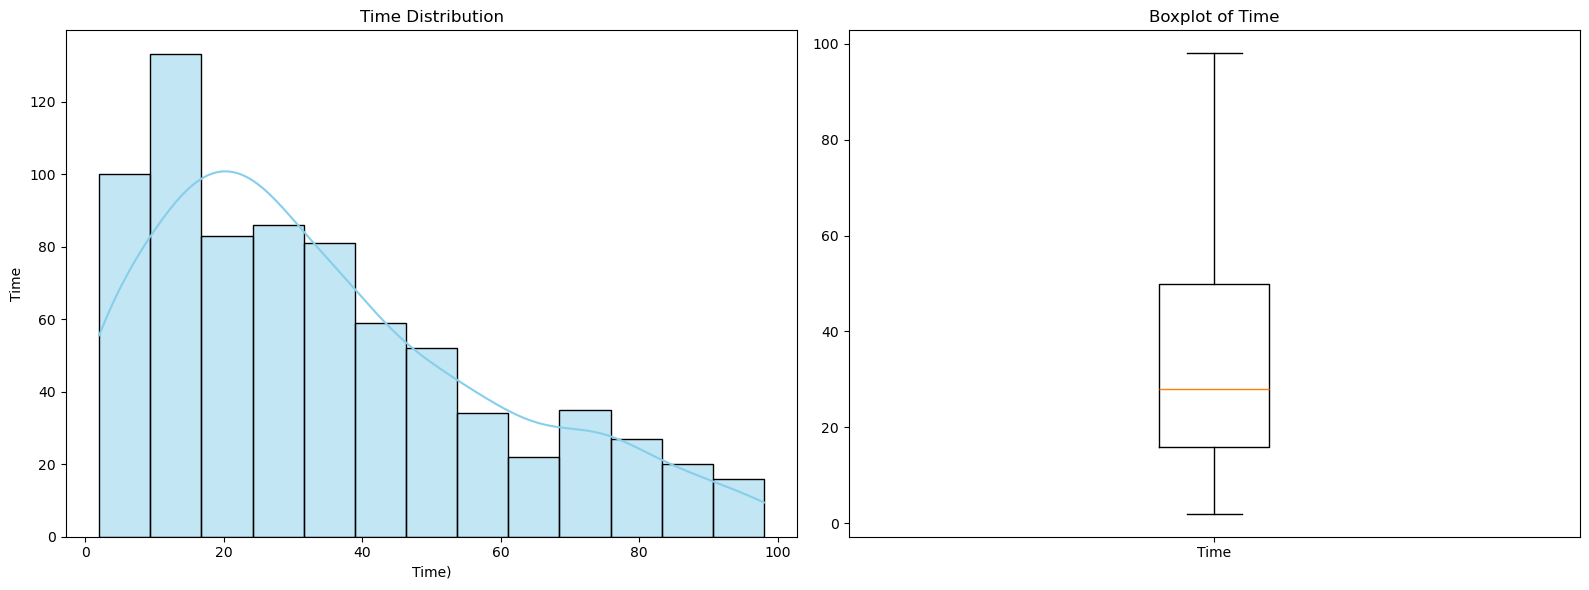

In [21]:
# histplot and boxplot of time
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(df['Time'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Time)')
axes[0].set_ylabel('Time')
axes[0].set_title('Time Distribution')

# Plotting boxplot using matplotlib
axes[1].boxplot(df['Time'])
axes[1].set_xticklabels(['Time'])
axes[1].set_title('Boxplot of Time')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

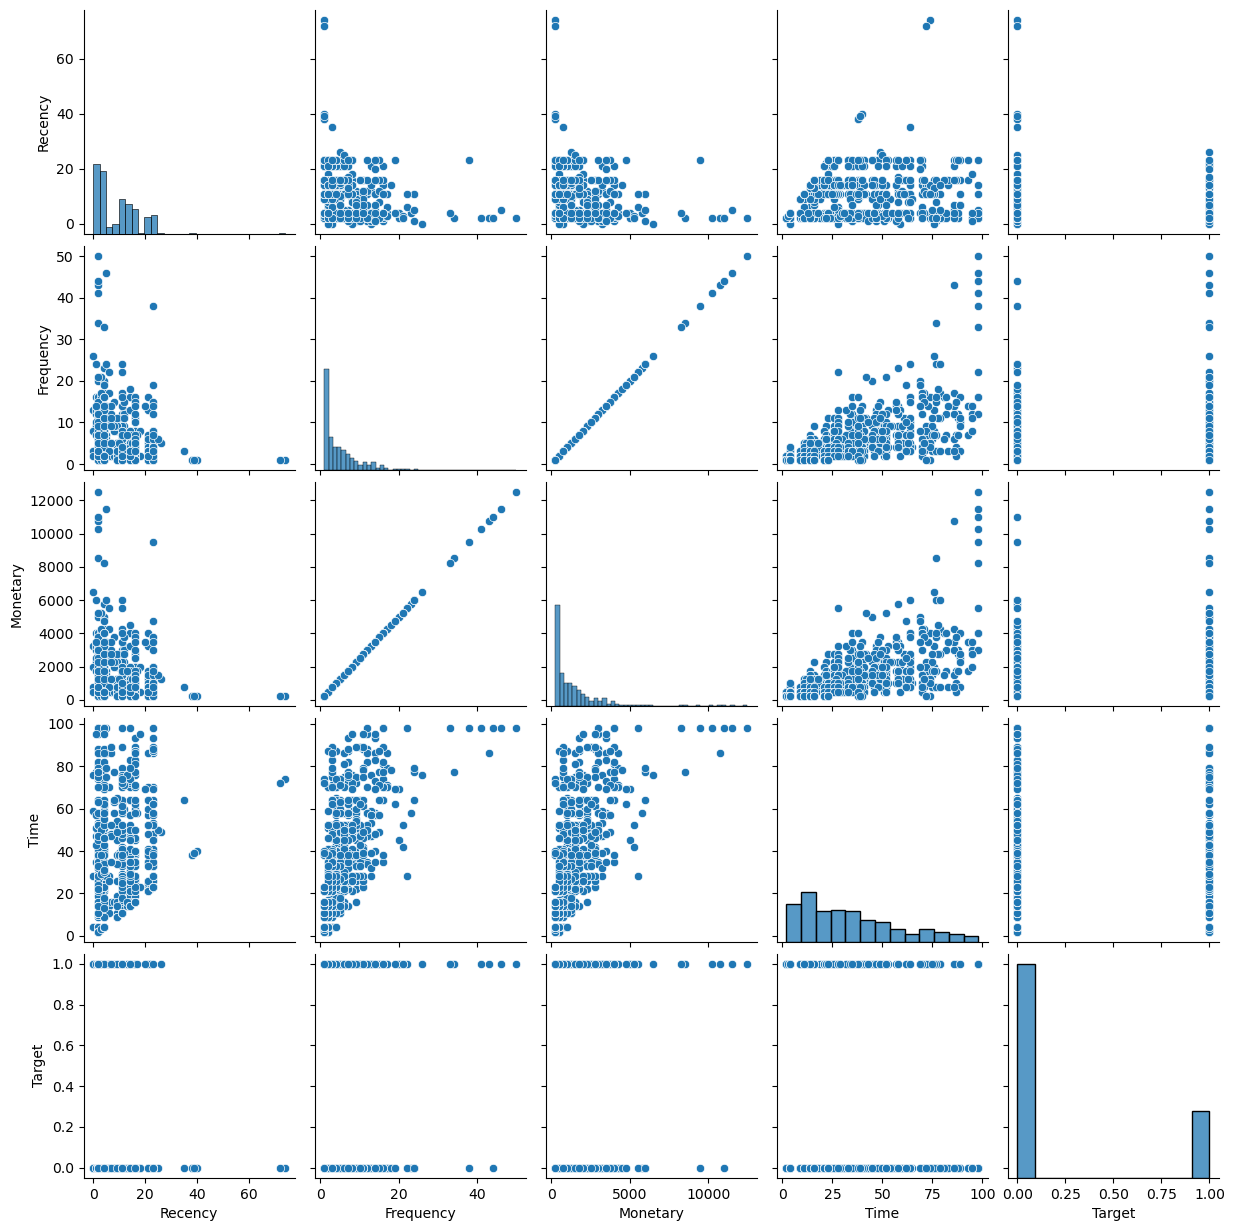

In [22]:
sns.pairplot(df)

<Axes: >

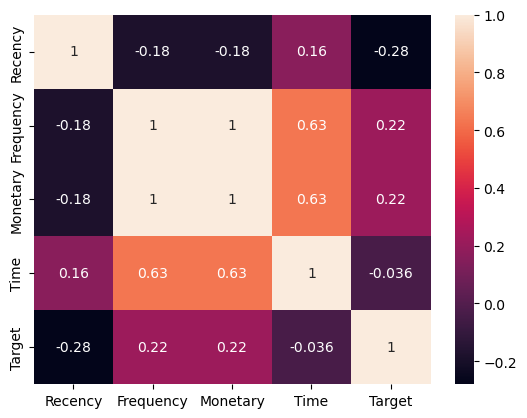

In [23]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr,annot=True)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [25]:
# Filter/subset/clean the data according to your EDA findings

# To be consistent with Lab 7.1.1, I will use all data as is.

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [27]:
# Supervised Modelling
#Classification (binary)

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [29]:
# Split your data
X = df.drop(columns = 'Target')
y=df['Target']

In [30]:
X.shape

(748, 4)

In [31]:
y.shape

(748,)

In [32]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Choose a model or models

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(random_state=42, max_features='sqrt', min_samples_leaf=2, min_samples_split=6, n_estimators=100)


# Step 9: Fit the Model

In [37]:
# Fit model
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=6, random_state=42)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate model against training set
# Make predictions
y_train_pred = rf.predict(X_train)

In [40]:
# Evaluate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.862876254180602


In [41]:
# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))

Confusion Matrix:
[[444  12]
 [ 70  72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.92       456
           1       0.86      0.51      0.64       142

    accuracy                           0.86       598
   macro avg       0.86      0.74      0.78       598
weighted avg       0.86      0.86      0.85       598



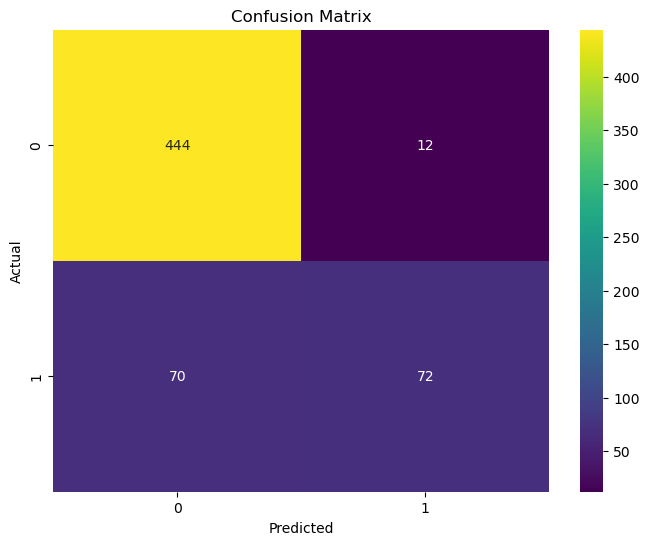

In [43]:
# Visualise the Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

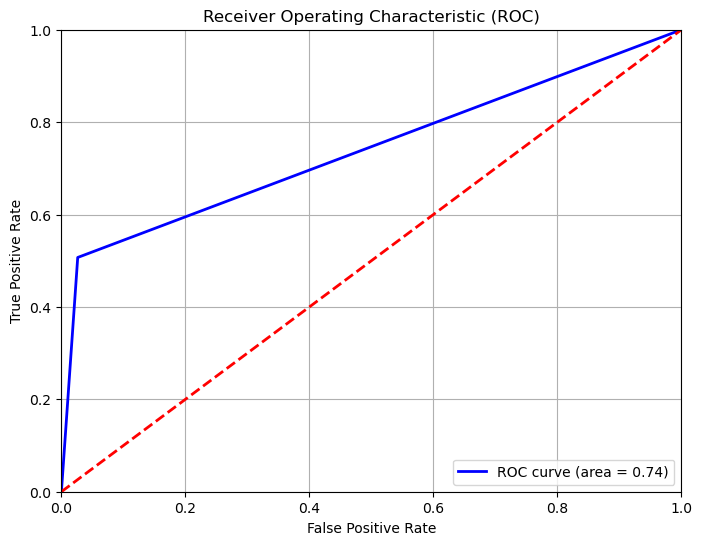

In [44]:
# Look at the ROC curve

from sklearn import metrics  # Import the metrics module
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _= metrics.roc_curve(y_train, y_train_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [45]:
# I used default settings for hyper-parameters
# Use Grid Search to determine best parameters and score

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None], # Number of features to consider for splitting a node
    'max_depth': [None, 10, 20],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
}

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:")
print(grid_search.best_params_)
print(f"Best Score: {grid_search.best_score_:.2f}")


C:\Users\mdjro\anaconda3\envs\IOD\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.78


In [47]:
# Predict on the training data
y_train_pred_grid = grid_search.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred_grid)

print(f"Training Accuracy: {training_accuracy:.2f}")

Training Accuracy: 0.83


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [50]:
# Predict with the best model
best_model = RandomForestClassifier(
    random_state=42,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=100
)


In [51]:
best_model.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [52]:
y_pred = best_model.predict(X_test)

In [53]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy with best parameters: 0.7800
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       114
           1       0.56      0.42      0.48        36

    accuracy                           0.78       150
   macro avg       0.69      0.66      0.67       150
weighted avg       0.76      0.78      0.77       150

Confusion Matrix:
[[102  12]
 [ 21  15]]


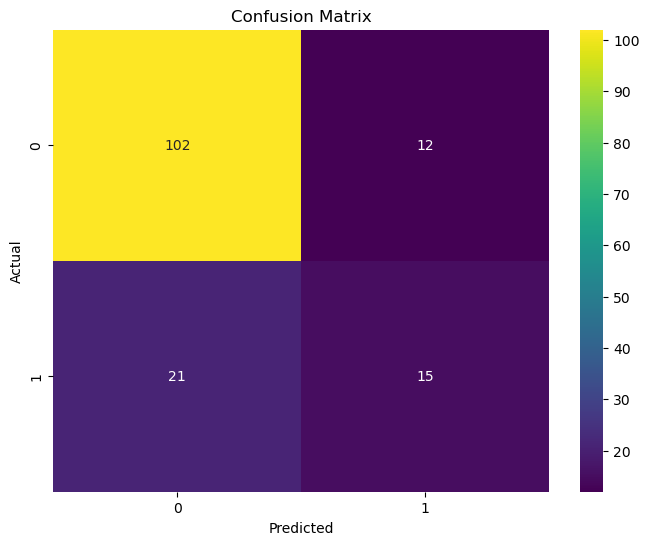

In [54]:
# Visualise the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

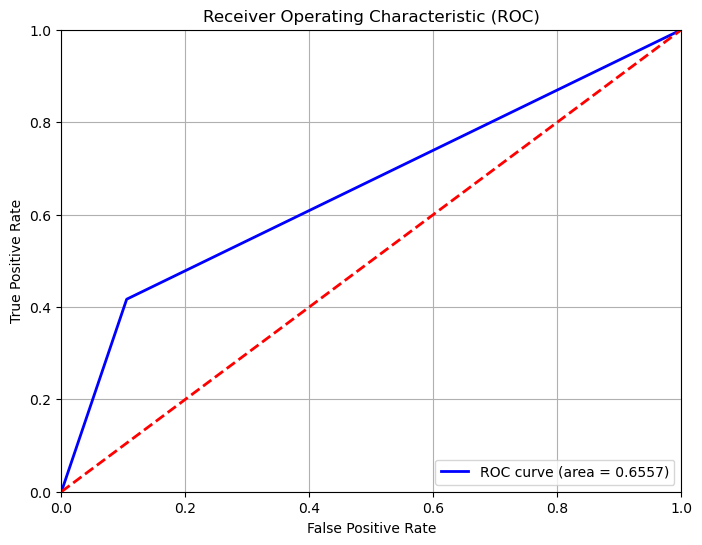

In [55]:
# Look at the ROC curve

from sklearn import metrics  # Import the metrics module
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _= metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [56]:
# ROC = 0.6557

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [58]:
#The model has met the minimum standards of:
#- Accuracy = 0.7419 - achieved 0.7800
#- ROC AUC = 0.6150 - achieved 0.6557

In [59]:
# Create a DataFrame with a single row of synthetic data
fake_data = pd.DataFrame({
    'Recency': [6.0],  
    'Frequency': [3.0],  
    'Monetary': [750],
    'Time': [30] 
})

In [60]:
# Make prediction for the single instance
prediction = best_model.predict(fake_data)

# Output the prediction
print("Prediction for the fake data:", prediction)

Prediction for the fake data: [0]


In [61]:
# No.  Not likely to donate blood in Mar 2007



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



